In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
#extracting validation data from full train data + scaling down
 
X_valid, X_train=X_train_full[ :5000]/255 , X_train_full[5000:]/255
y_valid,y_train=y_train_full[ :5000] , y_train_full[5000:]
X_test=X_test/255

In [9]:
len(X_valid)

5000

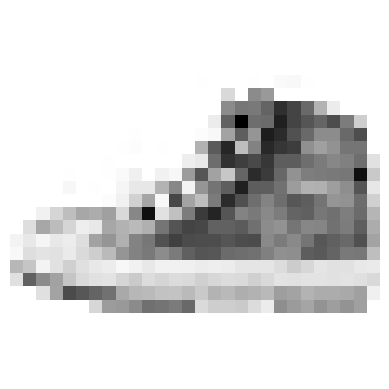

In [10]:
plt.imshow(X_train[2] ,cmap='binary')
plt.axis('off')
plt.show()

In [11]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
len(y_train)

55000

In [13]:
y_train[0]

np.uint8(4)

In [14]:
class_names=["T-shirt/top" , "Trouser" , "Pullover" , "Dress", "Coat","Sandal",
             "Shirt","Sneaker", "Bag" ,"Ankle boot" ]

In [15]:
class_names[y_train[2]]

'Sneaker'

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [107]:
#training ki ready
#architecture prep

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation= "softmax"))


In [108]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [109]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

In [110]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
keras.utils.plot_model(model, "my_fashion_minist.png" ,show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [113]:
#defining loss and specifying Optimiser

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD() ,
              metrics=["accuracy"])

In [115]:
#now we are ready to train NN

history=model.fit(X_train,y_train, epochs=20,
          validation_data= (X_valid,y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 55s 21ms/step - accuracy: 0.6778 - loss: 1.0135 - val_accuracy: 0.8262 - val_loss: 0.5134
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8241 - loss: 0.5063 - val_accuracy: 0.8484 - val_loss: 0.4485
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8416 - loss: 0.4521 - val_accuracy: 0.8562 - val_loss: 0.4167
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8514 - loss: 0.4222 - val_accuracy: 0.8634 - val_loss: 0.3971
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8590 - loss: 0.4009 - val_accuracy: 0.8668 - val_loss: 0.3830
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8646 - loss: 0.3841 - val_accuracy: 0.8688 - val_loss: 0.3720
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8690 - loss: 0.3704 - val_accuracy: 0.8710 - val_loss: 0.3628
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8734 - loss: 0.3583 

In [116]:
history.params

{'verbose': 'auto', 'epochs': 20, 'steps': 1719}

In [117]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

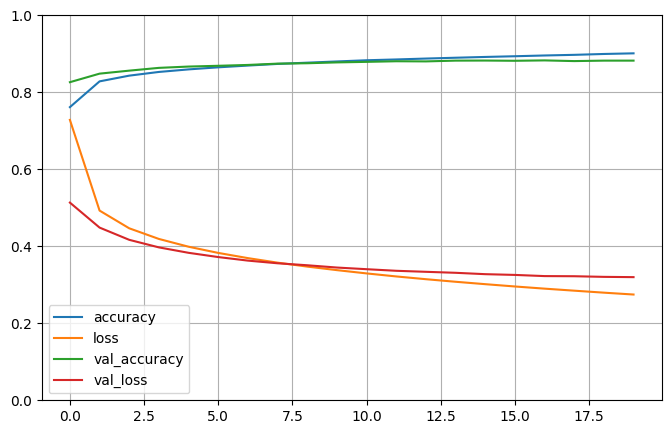

In [118]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [119]:
#Testing
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8724 - loss: 0.3604


[0.35996341705322266, 0.8727999925613403]

In [120]:
#test samples

X_new=X_test[:3]

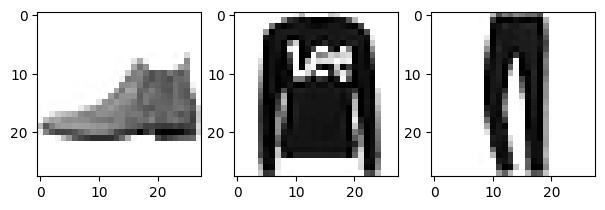

In [121]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [122]:
y_pred=np.argmax(model.predict(X_new) ,axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')